In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm
import imblearn
import xgboost as xgb
import nbformat

%matplotlib inline


# 데이터 확인

In [13]:
data = pd.read_csv('/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [17]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

print(data['Attrition'].value_counts())

Attrition
0    1233
1     237
Name: count, dtype: int64


# EDA

## 1. 부서별 이직률 비교

## Attrition Rate by Department Analysis
Department
Sales                     20.63
Human Resources           19.05
Research & Development    13.84
Name: Attrition, dtype: float64


/tmp/ipython-input-2787304772.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='viridis')


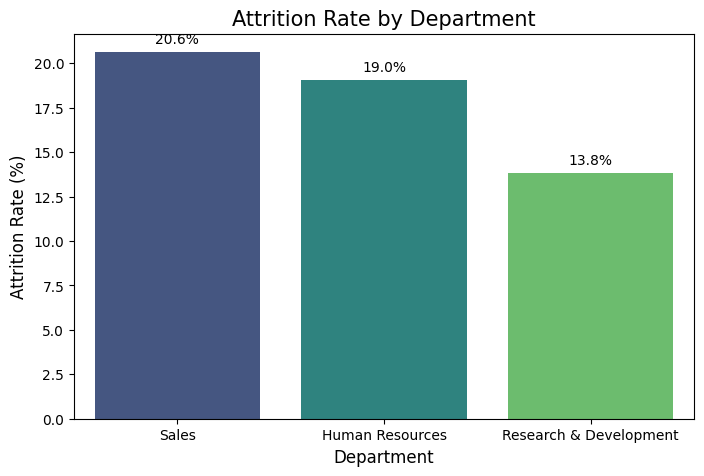

In [24]:
print("## Attrition Rate by Department Analysis")
dept_attrition = data.groupby('Department')['Attrition'].mean().sort_values(ascending=False) * 100
print(dept_attrition.round(2))

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='viridis')

ax.set_title('Attrition Rate by Department', fontsize=15)
ax.set_xlabel('Department', fontsize=12)
ax.set_ylabel('Attrition Rate (%)', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

## 2. 근무 환경 만족도, 동료 관계 만족도, 일과 생활의 밸런스와 이직률의 관계

/tmp/ipython-input-2242393052.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=env_attrition.index, y=env_attrition.values, palette='cubehelix', ax=axes[0])
/tmp/ipython-input-2242393052.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=rel_attrition.index, y=rel_attrition.values, palette='crest', ax=axes[1])
/tmp/ipython-input-2242393052.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(x=wlb_attrition.index, y=wlb_attrition.values, palette='plasma', ax=axes[2])


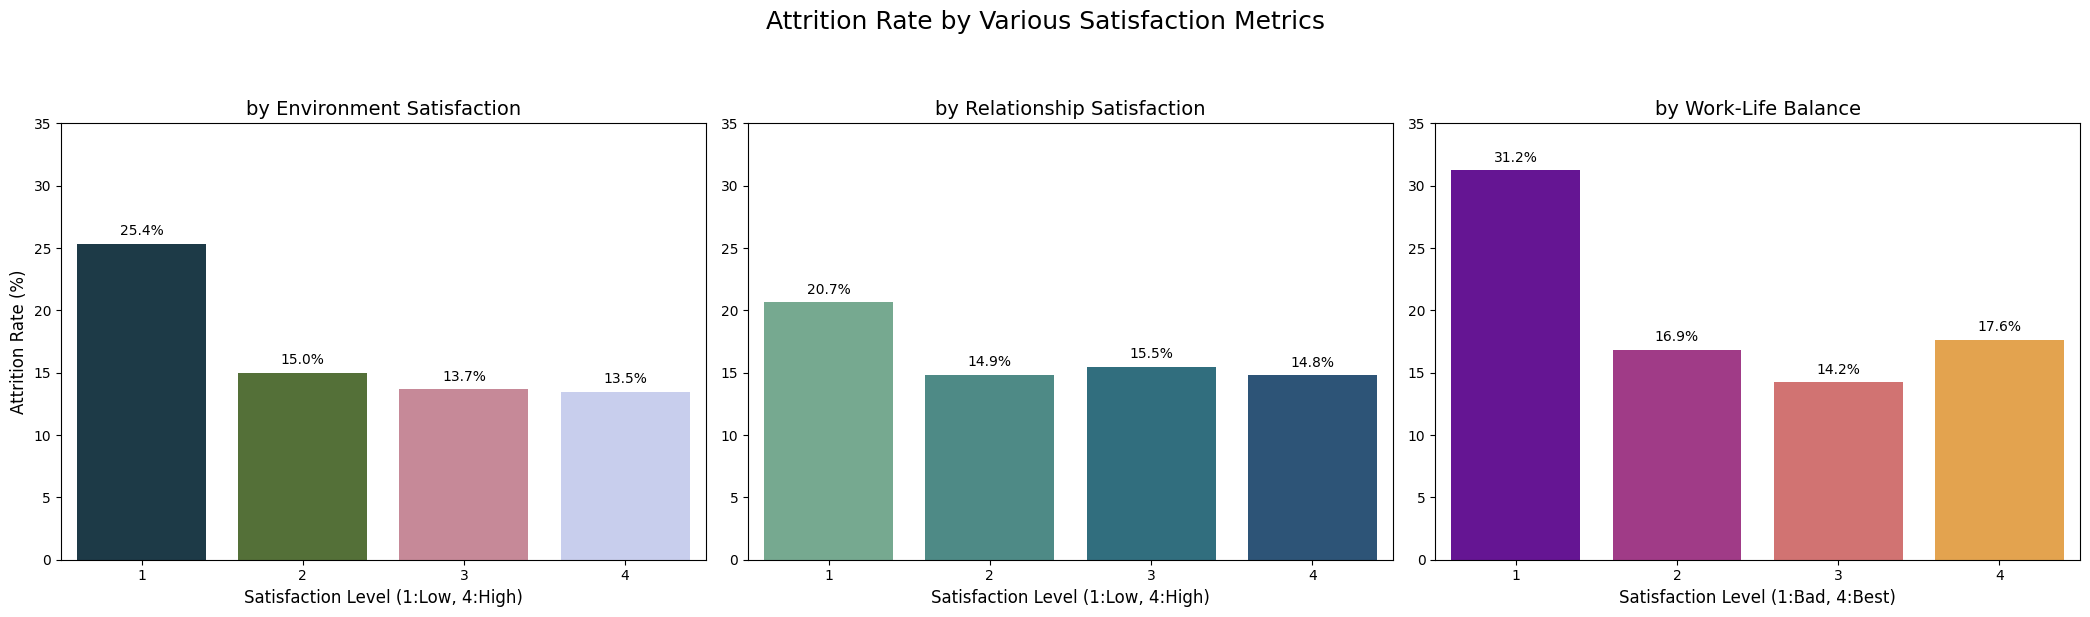

In [32]:
env_attrition = data.groupby('EnvironmentSatisfaction')['Attrition'].mean() * 100
rel_attrition = data.groupby('RelationshipSatisfaction')['Attrition'].mean() * 100
wlb_attrition = data.groupby('WorkLifeBalance')['Attrition'].mean() * 100

fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Attrition Rate by Various Satisfaction Metrics', fontsize=18, y=1.02)


ax1 = sns.barplot(x=env_attrition.index, y=env_attrition.values, palette='cubehelix', ax=axes[0])
ax1.set_title('by Environment Satisfaction', fontsize=14)
ax1.set_xlabel('Satisfaction Level (1:Low, 4:High)', fontsize=12)
ax1.set_ylabel('Attrition Rate (%)', fontsize=12)
ax1.set_ylim(0, 35) # Set y-axis limit for consistent comparison
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points')

ax2 = sns.barplot(x=rel_attrition.index, y=rel_attrition.values, palette='crest', ax=axes[1])
ax2.set_title('by Relationship Satisfaction', fontsize=14)
ax2.set_xlabel('Satisfaction Level (1:Low, 4:High)', fontsize=12)
ax2.set_ylabel('') # Hide y-label
ax2.set_ylim(0, 35) # Set y-axis limit for consistent comparison
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points')

ax3 = sns.barplot(x=wlb_attrition.index, y=wlb_attrition.values, palette='plasma', ax=axes[2])
ax3.set_title('by Work-Life Balance', fontsize=14)
ax3.set_xlabel('Satisfaction Level (1:Bad, 4:Best)', fontsize=12)
ax3.set_ylabel('') # Hide y-label
ax3.set_ylim(0, 35) # Set y-axis limit for consistent comparison
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 3. 초과근무와 이직률의 상관관계

## Attrition Rate by OverTime
OverTime
Yes    30.53
No     10.44
Name: Attrition, dtype: float64


/tmp/ipython-input-2405078292.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, palette='rocket')


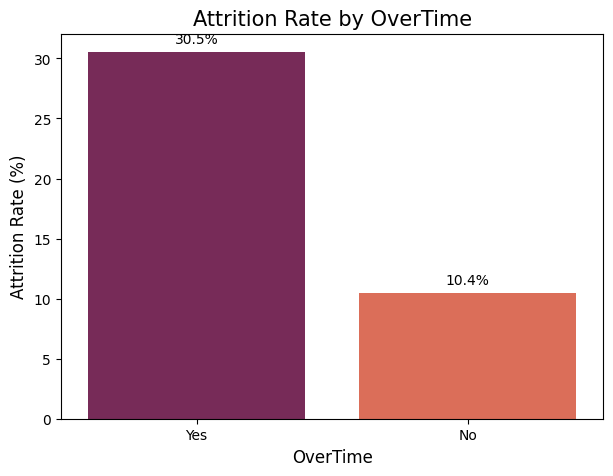

In [26]:
print("## Attrition Rate by OverTime")
overtime_attrition = data.groupby('OverTime')['Attrition'].mean().sort_values(ascending=False) * 100
print(overtime_attrition.round(2))

plt.figure(figsize=(7, 5))
ax = sns.barplot(x=overtime_attrition.index, y=overtime_attrition.values, palette='rocket')

ax.set_title('Attrition Rate by OverTime', fontsize=15)
ax.set_xlabel('OverTime', fontsize=12)
ax.set_ylabel('Attrition Rate (%)', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

## 4. 총경력, 현재 회사 근속 연수와 이직의 관계

/tmp/ipython-input-2331466610.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(x='Attrition', y='TotalWorkingYears', data=data, palette='viridis', ax=axes[0])
/tmp/ipython-input-2331466610.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Stayed (No)', 'Left (Yes)'])
/tmp/ipython-input-2331466610.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x='Attrition', y='YearsAtCompany', data=data, palette='magma', ax=axes[1])
/tmp/ipython-input-2331466610.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using

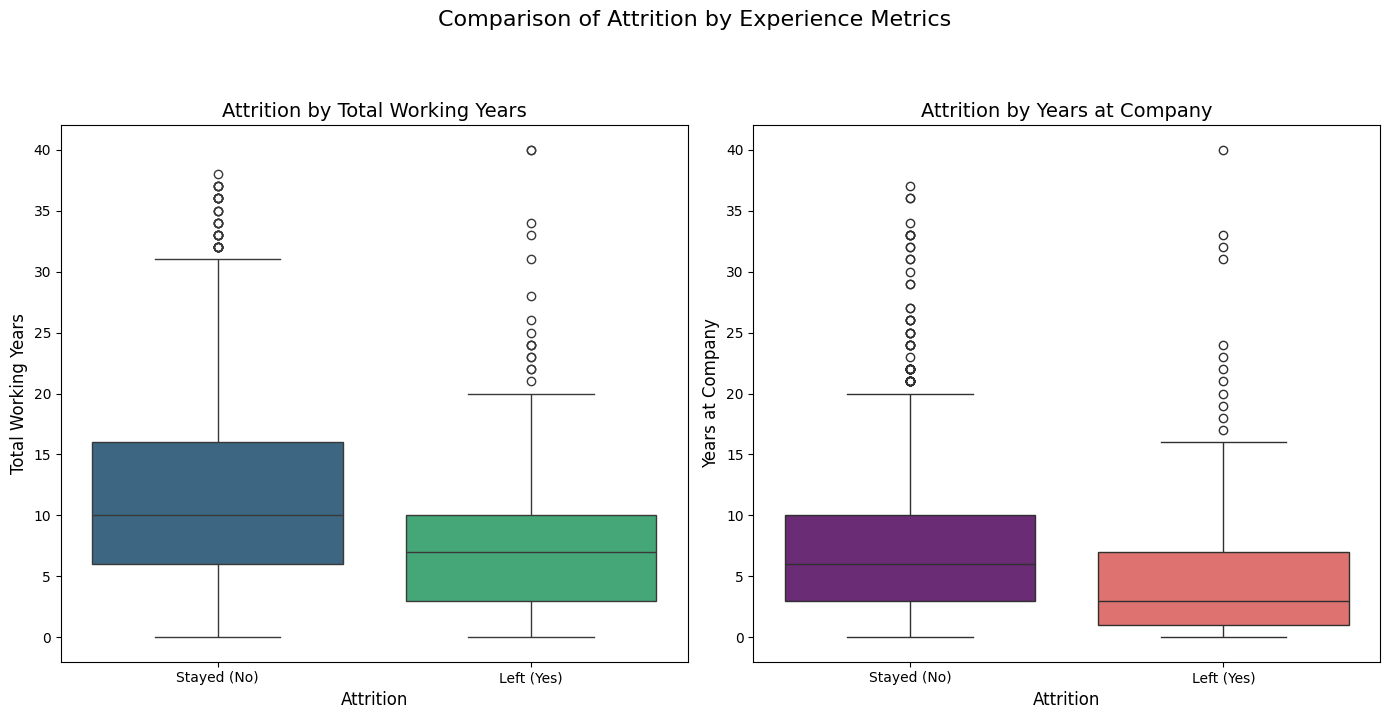

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Comparison of Attrition by Experience Metrics', fontsize=16, y=1.02)

ax1 = sns.boxplot(x='Attrition', y='TotalWorkingYears', data=data, palette='viridis', ax=axes[0])
ax1.set_title('Attrition by Total Working Years', fontsize=14)
ax1.set_xlabel('Attrition', fontsize=12)
ax1.set_ylabel('Total Working Years', fontsize=12)
ax1.set_xticklabels(['Stayed (No)', 'Left (Yes)'])

ax2 = sns.boxplot(x='Attrition', y='YearsAtCompany', data=data, palette='magma', ax=axes[1])
ax2.set_title('Attrition by Years at Company', fontsize=14)
ax2.set_xlabel('Attrition', fontsize=12)
ax2.set_ylabel('Years at Company', fontsize=12)
ax2.set_xticklabels(['Stayed (No)', 'Left (Yes)'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## 5. 경력직 vs 사회초년생, 누가 더 이직을 많이하는가?

## Attrition Rate by Employee Type
EmployeeType
New/Junior          18.78
Experienced Hire    14.86
Name: Attrition, dtype: float64


/tmp/ipython-input-334252686.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=type_attrition.index, y=type_attrition.values, palette='Set2')


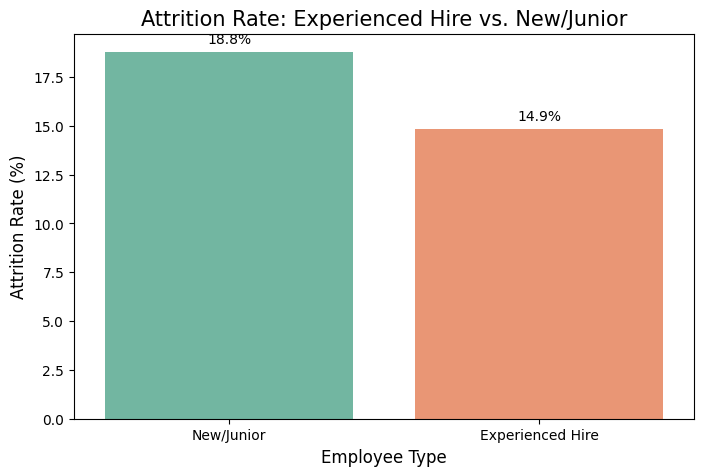

In [40]:
# Calculate years of experience before joining the current company
data['YearsBeforeCompany'] = data['TotalWorkingYears'] - data['YearsAtCompany']

# If prior experience is 0, classify as 'New/Junior'
data['EmployeeType'] = np.where(data['YearsBeforeCompany'] >= 1, 'Experienced Hire', 'New/Junior')

print("## Attrition Rate by Employee Type")
type_attrition = data.groupby('EmployeeType')['Attrition'].mean().sort_values(ascending=False) * 100
print(type_attrition.round(2))

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=type_attrition.index, y=type_attrition.values, palette='Set2')

ax.set_title('Attrition Rate: Experienced Hire vs. New/Junior', fontsize=15)
ax.set_xlabel('Employee Type', fontsize=12)
ax.set_ylabel('Attrition Rate (%)', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

## 6. 월급과 이직률의 관계

## Attrition Rate by Salary Range
SalaryRange
Low          29.27
Medium       14.21
High         10.63
Very High    10.33
Name: Attrition, dtype: float64


/tmp/ipython-input-2186531193.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_attrition = data.groupby('SalaryRange')['Attrition'].mean().sort_values(ascending=False) * 100
/tmp/ipython-input-2186531193.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=salary_attrition.index, y=salary_attrition.values, palette='RdYlGn_r') # Red to Green palette


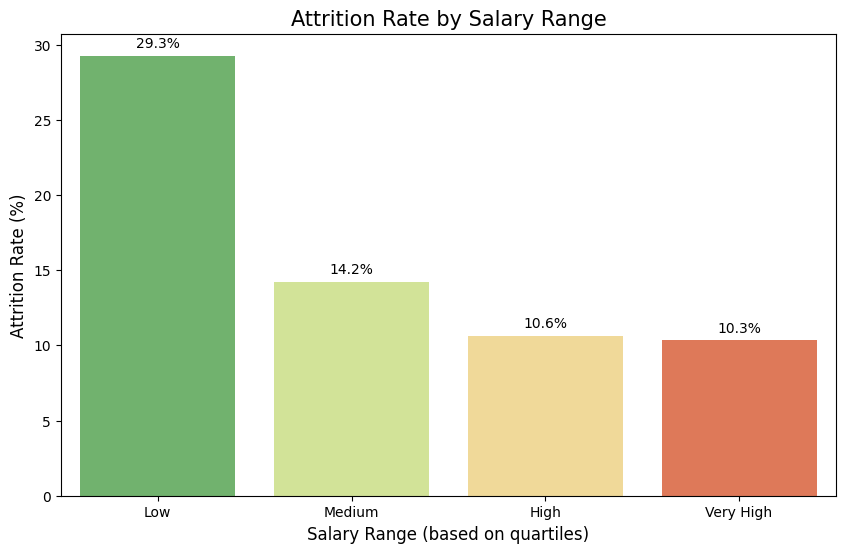

In [36]:
data['SalaryRange'] = pd.qcut(data['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print("## Attrition Rate by Salary Range")
salary_attrition = data.groupby('SalaryRange')['Attrition'].mean().sort_values(ascending=False) * 100
print(salary_attrition.round(2))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=salary_attrition.index, y=salary_attrition.values, palette='RdYlGn_r') # Red to Green palette

ax.set_title('Attrition Rate by Salary Range', fontsize=15)
ax.set_xlabel('Salary Range (based on quartiles)', fontsize=12)
ax.set_ylabel('Attrition Rate (%)', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()